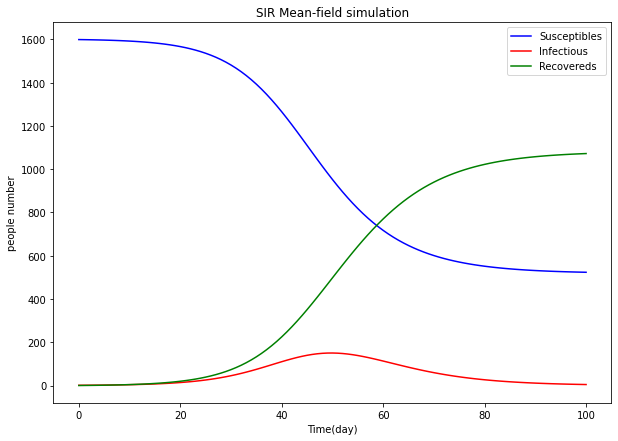

In [2]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

beta=1/3
gamma=1/5
TS=1.0
ND=100
S0=1-1/1600
I0=1/1600
INPUT = (S0, I0, 0.0)


def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP    
	Y[0] = - beta * V[0] * V[1]
	Y[1] = beta * V[0] * V[1] - gamma * V[1]
	Y[2] = gamma * V[1]
	return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

for i in range(len(RES)):
	RES[i,0]*=1600
	RES[i,1]*=1600
	RES[i,2]*=1600

pl.figure(figsize=(10,7))
pl.rcParams.update({'font.size': 10})
pl.title('SIR Mean-field simulation')
pl.plot(RES[:,0], '-b', label='Susceptibles')
pl.plot(RES[:,1], '-r', label='Infectious')
pl.plot(RES[:,2], '-g', label='Recovereds')
pl.legend(loc=0)
pl.xlabel('Time(day)')
pl.ylabel('people number')
pl.savefig('SIR-Mean-field')
pl.show()